Лабораторна робота №2
Студента групи МІТ-31 (Друга підгрупа)
Шило Івана Костянтиновича

Завдання

1. Створити набір даних за допомогою DatasetGenerator

2. Завантажити набір даних для регресії на сайті (у кожного студента має бути інший - прошу організуватись відповідним чином)

3. (опціонально для отримання відмінної оцінки) Згенерувати набір даних для регресії на основі звичайних можливостей Python.

4. Для отриманих наборів даних провести встановленні кроки моделювання.

5. Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab2.

1.Моделювання для набору даних створеного за домопогою DatasetGenerator

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
#!pip install -U scikit-learn

In [29]:
import sklearn 
X, y = sklearn.datasets.make_regression(n_samples=100, n_features=10, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
y

array([-162.8225757 , -305.16567038,    7.83630482, -450.36054529,
         18.96268854, -312.46601692,  357.79039627,   26.82331494,
       -132.54908855,  122.0492665 , -170.06561565, -132.50648118,
        664.45603979,   56.69724218,  313.24807814,   -9.13153177,
         94.69912549, -189.94776165,  392.89201498,  233.01368466,
        188.09599944, -209.75287776,  384.15090664,  213.3925907 ,
          6.86476837, -329.2792872 , -535.64917787,  -56.6390688 ,
        -90.98659566,  -83.9074292 ,   73.14896348, -245.02634144,
        460.63195088,  109.22753131,   40.45839782,  597.56211845,
       -216.81313168,  156.26722934, -153.81233363,  234.54476867,
         44.30786054, -163.9123614 ,   96.85531987,  106.23989211,
       -260.53830678,  -51.79457399, -280.7587067 ,  185.11412402,
       -132.08212185,   51.79750136,  -49.90218071,  -27.58814147,
       -191.30658497,  334.42215274,  277.06249179,  -31.39345199,
       -140.08665105,  152.3177731 ,  -92.52517445,   29.19996

In [30]:
df = pd.DataFrame(X, y)
df.head()

,0,1,2,3,4,5,6,7,8,9
-162.822576,0.437313,-0.477777,1.454934,-0.468565,0.763614,-1.444252,-1.297104,-0.224795,-0.802568,-0.696099
-305.165670,1.261253,-1.074014,-1.218957,-1.274772,1.029647,1.409326,-1.762419,-1.488092,-0.943540,-0.614948
7.836305,-0.245059,0.353137,1.586337,-1.312605,0.396158,-0.050477,-0.617513,0.185468,-1.020459,0.250698
-450.360545,-0.281145,-0.525003,-0.678907,-0.338549,-0.967532,-0.391796,-0.955658,-0.947853,-0.568150,-1.046045
18.962689,0.362778,-0.135354,0.221433,0.302679,-1.062218,1.998446,-0.071928,-0.007795,-1.586323,1.148182


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 100 entries, -162.8225756997924 to 142.264643071904
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
 3   3       100 non-null    float64
 4   4       100 non-null    float64
 5   5       100 non-null    float64
 6   6       100 non-null    float64
 7   7       100 non-null    float64
 8   8       100 non-null    float64
 9   9       100 non-null    float64
dtypes: float64(10)
memory usage: 8.6 KB


In [32]:
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.019715,0.045575,-0.173447,0.107268,-0.140845,0.344686,0.074658,0.170851,-0.141150,-0.079309
std,0.989782,1.007051,1.055328,1.018432,0.944632,0.968235,1.027826,1.069404,0.942560,1.134659
min,-2.864761,-2.175321,-2.422960,-1.989644,-2.056585,-2.251124,-2.629195,-2.089239,-2.278122,-2.985511
25%,-0.524752,-0.578349,-0.915632,-0.567629,-0.780779,-0.245466,-0.620486,-0.620638,-0.800714,-0.762491
50%,-0.001455,-0.133207,-0.244095,0.071996,-0.133094,0.311905,0.171807,0.015816,-0.037330,-0.177178
75%,0.478969,0.939879,0.514644,0.849494,0.552882,0.962585,0.784646,0.955010,0.448402,0.492795
max,2.612750,2.287294,2.478171,2.455089,2.453260,2.800676,2.470953,3.236893,2.635491,2.540318


<AxesSubplot:>

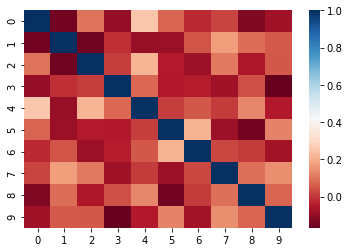

In [33]:
correlation = df.corr()
sns.heatmap(correlation, cmap = "RdBu")

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


In [39]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train,y_train)
y_Hat = Lr.predict(X_test)
y_Hat

array([  96.85531987, -260.53830678,   -4.87979514,   56.69724218,
        313.24807814,  384.15090664,  357.79039627,  219.56522564,
        236.71653124,  -16.73393013,  -27.58814147,  288.70969495,
       -305.16567038,  106.23989211,    6.86476837, -140.45561397,
        156.26722934,   26.82331494,  392.89201498,  130.07100151,
        112.24874903,  188.09599944, -329.2792872 ,  343.30106112,
       -163.9123614 , -132.54908855, -351.78529197,  -49.90218071,
        257.06310659, -312.46601692])

In [36]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_Hat)

2.225183000822047e-13

In [37]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, y_Hat)

6.4204863168668e-26

In [38]:
result = pd.DataFrame(y_test)
result['L_predicted'] = y_Hat

result.head()

,0,L_predicted
0,96.855320,96.855320
1,-260.538307,-260.538307
2,-4.879795,-4.879795
3,56.697242,56.697242
4,313.248078,313.248078
